In [1]:
full_trainingjobs =  ["chemprot-abstract-bert-f1-2022-12-25-09-01-04-544",
          "chemprot-abstract-bert-f1-2022-12-25-09-01-03-154",
          "chemprot-abstract-bert-f1-2022-12-25-09-01-01-712",
          "chemprot-abstract-bert-f1-2022-12-25-09-01-00-176", 
          "chemprot-abstract-bert-f1-2022-12-25-09-00-58-577"]

min_trainingjobs =  ["chemprot-abstract-bert-min-f1-2022-12-25-03-37-47-264",
          "chemprot-abstract-bert-min-f1-2022-12-25-03-37-45-624",
          "chemprot-abstract-bert-min-f1-2022-12-25-03-37-44-084",
          "chemprot-abstract-bert-min-f1-2022-12-25-03-37-42-553", 
          "chemprot-abstract-bert-min-f1-2022-12-25-03-37-40-991"]

s3_output_predictions = {"Full":[], "Min": []}


for t in full_trainingjobs:
        s3_output_predictions["Full"].append(f"s3://aegovan-data/chemprot/predictions_{t}/2022122510/chemprot_abstract_test.json.json")


for t in min_trainingjobs:
        s3_output_predictions["Min"].append(f"s3://aegovan-data/chemprot/predictions_{t}/2022122510/chemprot_abstract_test.json.json")




In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support, classification_report



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix, confidence=0.0):
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
    total_predictions= len(df)
    df = df.query(f"confidence > {confidence} ")

    name = s3_prefix
    prediction_above_threshold = len(df)

    labels = list(df["label"].unique())
    labels.remove("NEGATIVE")
    d = classification_report(df["label"],
                                            df["prediction"],
                                            output_dict=True,
                                            labels=labels,
                                              zero_division=0)
    return  pd.DataFrame(d).T
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s, confidence=0.0) for s in s3_prefixes]
    df =  pd.concat(result)
    df["label"] = df.index
    return df


In [5]:
df_stats = create_dfs_from_prefixes(s3_output_predictions["Full"])
df_stats

,precision,recall,f1-score,support,label
CPR:3,0.654676,0.682159,0.668135,667.0,CPR:3
CPR:4,0.831325,0.786443,0.808261,1667.0,CPR:4
CPR:5,0.786802,0.782828,0.784810,198.0,CPR:5
CPR:6,0.795380,0.822526,0.808725,293.0,CPR:6
CPR:9,0.779570,0.675466,0.723794,644.0,CPR:9
micro avg,0.779880,0.748631,0.763936,3469.0,micro avg
macro avg,0.769551,0.749884,0.758745,3469.0,macro avg
weighted avg,0.782175,0.748631,0.764338,3469.0,weighted avg
CPR:3,0.682353,0.695652,0.688938,667.0,CPR:3
CPR:4,0.802339,0.823035,0.812556,1667.0,CPR:4


In [6]:
df_stats.groupby("label").describe().T

label                 CPR:3        CPR:4       CPR:5       CPR:6       CPR:9  \
precision count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.687114     0.817516    0.814086    0.835656    0.779574   
          std      0.027466     0.018201    0.059085    0.038770    0.019817   
          min      0.654676     0.794135    0.732456    0.795380    0.750388   
          25%      0.680224     0.802339    0.786802    0.807432    0.777108   
          50%      0.682353     0.824827    0.808824    0.833333    0.779570   
          75%      0.687671     0.831325    0.868852    0.847826    0.785110   
          max      0.730645     0.834951    0.873494    0.894309    0.805695   
recall    count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.707346     0.806479    0.798990    0.794539    0.739130   
          std      0.031652     0.019487    0.044376    0.028494    0.046024   
          min      0.679160     0.785243    0.732323    0.750853    0.675466   
          25%      0.682159     0.786443    0.782828    0.784983    0.720497   
          50%      0.695652     0.812238    0.803030    0.798635    0.746894   
          75%      0.727136     0.823035    0.833333    0.815700    0.751553   
          max      0.752624     0.825435    0.843434    0.822526    0.801242   
f1-score  count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.696524     0.811723    0.804218    0.813506    0.758071   
          std      0.019042     0.010942    0.022607    0.005941    0.025092   
          min      0.668135     0.803084    0.784038    0.808436    0.723794   
          25%      0.688938     0.804548    0.784810    0.808725    0.750970   
          50%      0.702899     0.808261    0.796703    0.811545    0.751417   
          75%      0.703963     0.812556    0.820896    0.816327    0.775181   
          max      0.718683     0.830166    0.834646    0.822496    0.788991   
support   count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean   667.000000  1667.000000  198.000000  293.000000  644.000000   
          std      0.000000     0.000000    0.000000    0.000000    0.000000   
          min    667.000000  1667.000000  198.000000  293.000000  644.000000   
          25%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          50%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          75%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          max    667.000000  1667.000000  198.000000  293.000000  644.000000   

label              macro avg    micro avg  weighted avg  
precision count     5.000000     5.000000      5.000000  
          mean      0.786789     0.784933      0.786735  
          std       0.022097     0.011017      0.012093  
          min       0.763072     0.768861      0.769478  
          25%       0.769551     0.779880      0.782175  
          50%       0.783197     0.788148      0.787827  
          75%       0.802415     0.789949      0.792079  
          max       0.815710     0.797824      0.802118  
recall    count     5.000000     5.000000      5.000000  
          mean      0.769297     0.773479      0.773479  
          std       0.024457     0.022534      0.022534  
          min       0.748490     0.748631      0.748631  
          25%       0.749884     0.761026      0.761026  
          50%       0.759982     0.766792      0.766792  
          75%       0.782462     0.784376      0.784376  
          max       0.805667     0.806572      0.806572  
f1-score  count     5.000000     5.000000      5.000000  
          mean      0.776808     0.778993      0.779335  
          std       0.012908     0.012283      0.012513  
          min       0.758745     0.763936      0.764338  
          25%       0.771799     0.776541      0.776566  
          50%       0.779132     0.777323      0.776687  
          75%       0.780

In [7]:
df_stats_min = create_dfs_from_prefixes(s3_output_predictions["Min"])
df_stats_min

,precision,recall,f1-score,support,label
CPR:3,0.511254,0.238381,0.325153,667.0,CPR:3
CPR:4,0.834842,0.442711,0.578597,1667.0,CPR:4
CPR:5,0.801242,0.651515,0.718663,198.0,CPR:5
CPR:6,0.832599,0.645051,0.726923,293.0,CPR:6
CPR:9,0.688645,0.583851,0.631933,644.0,CPR:9
micro avg,0.747299,0.458634,0.568417,3469.0,micro avg
macro avg,0.733716,0.512302,0.596254,3469.0,macro avg
weighted avg,0.743376,0.458634,0.560290,3469.0,weighted avg
CPR:3,0.354633,0.332834,0.343387,667.0,CPR:3
CPR:4,0.770477,0.513497,0.616271,1667.0,CPR:4


In [8]:
df_stats_min.groupby("label").describe().T

label                 CPR:3        CPR:4       CPR:5       CPR:6       CPR:9  \
precision count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.507549     0.779701    0.765949    0.801093    0.653014   
          std      0.115635     0.037428    0.094418    0.075841    0.091676   
          min      0.354633     0.730238    0.607692    0.716923    0.522310   
          25%      0.437086     0.770477    0.753247    0.723077    0.595128   
          50%      0.511254     0.777929    0.801242    0.832599    0.688645   
          75%      0.595082     0.785016    0.832335    0.854077    0.719101   
          max      0.639692     0.834842    0.835227    0.878788    0.739884   
recall    count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.421589     0.612478    0.695960    0.690785    0.596273   
          std      0.130035     0.125925    0.081703    0.062356    0.182124   
          min      0.238381     0.442711    0.585859    0.641638    0.309006   
          25%      0.332834     0.513497    0.651515    0.645051    0.583851   
          50%      0.494753     0.685063    0.702020    0.679181    0.596273   
          75%      0.497751     0.698260    0.742424    0.692833    0.695652   
          max      0.544228     0.722855    0.797980    0.795222    0.796584   
f1-score  count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean     0.452212     0.677992    0.723090    0.738472    0.613809   
          std      0.115375     0.076007    0.051647    0.036927    0.129058   
          min      0.325153     0.578597    0.659091    0.679928    0.388293   
          25%      0.343387     0.616271    0.689956    0.726923    0.631933   
          50%      0.464135     0.713891    0.718663    0.754045    0.660361   
          75%      0.559865     0.728549    0.761644    0.756654    0.681275   
          max      0.568520     0.752655    0.786096    0.774809    0.707182   
support   count    5.000000     5.000000    5.000000    5.000000    5.000000   
          mean   667.000000  1667.000000  198.000000  293.000000  644.000000   
          std      0.000000     0.000000    0.000000    0.000000    0.000000   
          min    667.000000  1667.000000  198.000000  293.000000  644.000000   
          25%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          50%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          75%    667.000000  1667.000000  198.000000  293.000000  644.000000   
          max    667.000000  1667.000000  198.000000  293.000000  644.000000   

label              macro avg    micro avg  weighted avg  
precision count     5.000000     5.000000      5.000000  
          mean      0.701461     0.697815      0.704876  
          std       0.067169     0.056273      0.049767  
          min       0.595638     0.615239      0.631155  
          25%       0.675476     0.665372      0.675852  
          50%       0.733716     0.720602      0.730521  
          75%       0.741828     0.740561      0.743376  
          max       0.760647     0.747299      0.743475  
recall    count     5.000000     5.000000      5.000000  
          mean      0.603417     0.584145      0.584145  
          std       0.082384     0.111766      0.111766  
          min       0.512302     0.458634      0.458634  
          25%       0.518991     0.467858      0.467858  
          50%       0.634073     0.641972      0.641972  
          75%       0.663959     0.661574      0.661574  
          max       0.687759     0.690689      0.690689  
f1-score  count     5.000000     5.000000      5.000000  
          mean      0.641115     0.631514      0.630348  
          std       0.071566     0.078172      0.080221  
          min       0.543567     0.531521      0.531062  
          25%       0.596254     0.568417      0.560290  
          50%       0.650305     0.653462      0.656196  
          75%       0.707

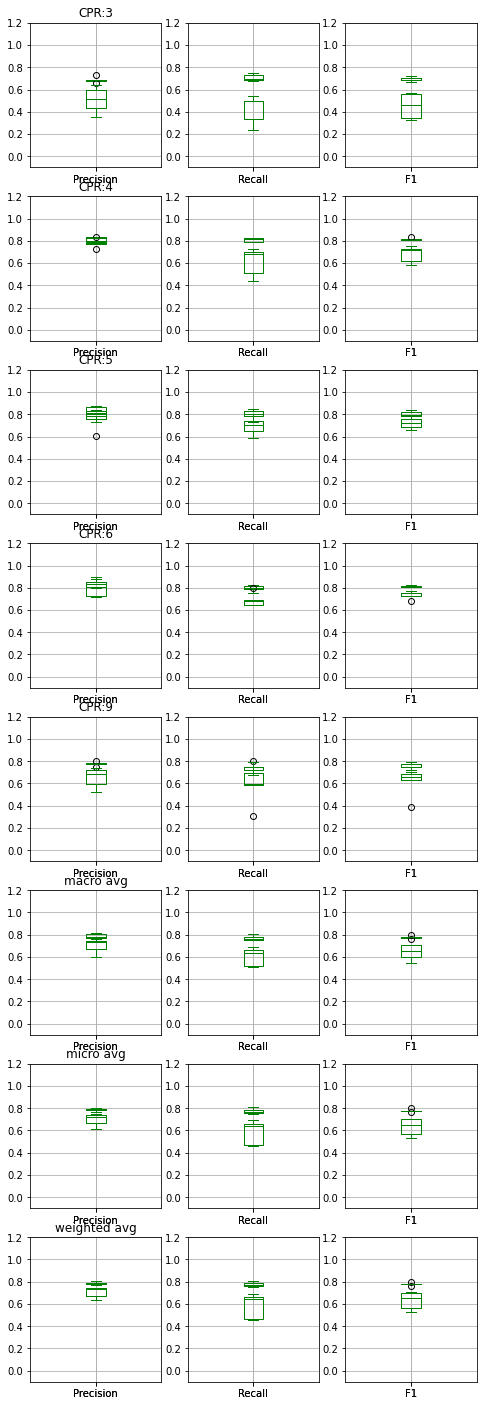

In [9]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(dfstats, dfstats2):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")
        
        fig, ax = plt.subplots(8,3, figsize=(8,25))
        dfstats2group = dfstats2.groupby("label")
        for i, (l, df) in enumerate(dfstats.groupby("label")):
            
            my_colors= [ "green",  "orange"]

            linetype = "-"
            legend_suffix = ""

            column_renames={"precision": "Precision" , 
                            "recall" : "Recall" , 
                            "f1-score": "F1" , 
                           }

            df2=dfstats2.query(f"label=='{l}'")


            for ic, c in enumerate(column_renames):
                
                ax[i][0].set_title(l)
                ax[i][ic].set_ylim(-0.1,1.2)


                df[[c]]\
                    .rename(columns=column_renames)\
                    .boxplot(  ax=ax[i][ic], color="green")

                
                df2[[c]]\
                    .rename(columns=column_renames)\
                    .boxplot( ax=ax[i][ic], color="green")
                
     

plot_comparison(df_stats, df_stats_min)   

In [10]:
from scipy import stats


 
    
# stats.ttest_ind(df_stats.query("TrainAdverserialNegative == 21")["Precision"], 
#                 df_stats.query("TrainAdverserialNegative == 63")["Precision"])